In [82]:
import numpy as np
import datetime
import pandas as pd
import yfinance as yf
import yahoofinancials
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.figure as fig
import mplfinance as mfp


# Measuring returns of Axis Bank and ICICI Bank  with respect to NIFTY 50 using Sharpe Ratio, Treynor Ratio and Jenson's Alpha

<b>The last five year data has been taken for performance mesurement

In [83]:
data1 = pdr.get_data_yahoo('^NSEI', datetime.date.today() - datetime.timedelta(1825),datetime.date.today())
data2 = pdr.get_data_yahoo('ICICIBANK.NS', datetime.date.today() - datetime.timedelta(1825),datetime.date.today())
data = pdr.get_data_yahoo('AXISBANK.NS', datetime.date.today() - datetime.timedelta(1825),datetime.date.today())

In [84]:
data1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-03,10176.200195,10035.549805,10108.299805,10061.549805,794700.0,10061.549805
2020-06-04,10123.849609,9944.250000,10054.250000,10029.099609,775100.0,10029.099609
2020-06-05,10177.799805,10040.750000,10093.799805,10142.150391,987100.0,10142.150391
2020-06-08,10328.500000,10120.250000,10326.750000,10167.450195,936500.0,10167.450195
2020-06-09,10291.150391,10021.450195,10181.150391,10046.650391,0.0,10046.650391


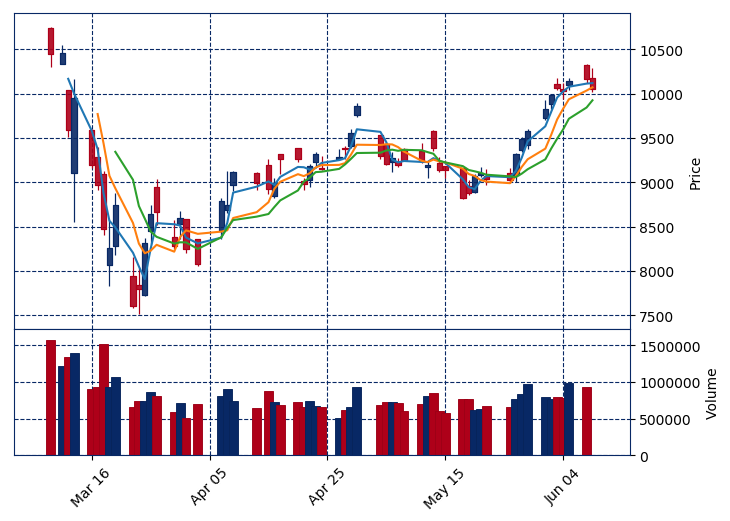

In [85]:
mfp.plot(data1.drop('Adj Close', axis = 1)[-60: ], type = "candle", volume=True, 
                         mav=(3,6,9), 
                         show_nontrading=True, 
                         figscale=1.1,
                        style = 'starsandstripes')
#candlestick for nifty for last two months.

In [86]:
data['Axis_Adj Close'] = data['Adj Close']
data['ICICI_Adj Close'] = data2['Adj Close']
data['Nifty_Adj Close'] = data1['Adj Close']

data['return_axis'] = ((data['Adj Close'] - data['Adj Close'].shift(1))/data['Adj Close'].shift(1))*100
data['return_icici'] = ((data['ICICI_Adj Close'] - data['ICICI_Adj Close'].shift(1))/data['ICICI_Adj Close'].shift(1))*100
data['return_nifty'] = ((data['Nifty_Adj Close'] - data['Nifty_Adj Close'].shift(1))/data['Nifty_Adj Close'].shift(1))*100

In [87]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,Axis_Adj Close,ICICI_Adj Close,Nifty_Adj Close,return_axis,return_icici,return_nifty
Date,,,,,,,,,,,,
2015-06-11,570.200012,545.049988,567.900024,546.750000,7608358.0,531.475281,531.475281,247.193405,7965.350098,NaN,NaN,NaN
2015-06-12,552.500000,540.799988,547.000000,551.450012,5518696.0,536.043945,536.043945,253.576019,7982.899902,0.859619,2.582033,0.220327
2015-06-15,555.000000,545.349976,553.900024,550.049988,5896234.0,534.683044,534.683044,256.361145,8013.899902,-0.253879,1.098340,0.388330
2015-06-16,553.950012,540.049988,550.000000,551.150024,6283177.0,535.752380,535.752380,258.803162,8047.299805,0.199994,0.952569,0.416775
2015-06-17,557.400024,547.599976,553.099976,549.250000,4522392.0,533.905396,533.905396,258.203705,8091.549805,-0.344746,-0.231627,0.549874


In [88]:
return_axis_mean = data['return_axis'].mean()
print("return of Axis: ", return_axis_mean)
return_icici_mean = data['return_icici'].mean()
print("return of ICICI: ", return_icici_mean)
return_nifty_mean = data['return_nifty'].mean()
print("return of NIFTY 50: ", return_nifty_mean)

return of Axis:  0.009150968756186314
return of ICICI:  0.053704101571102975
return of NIFTY 50:  0.028082913098349746


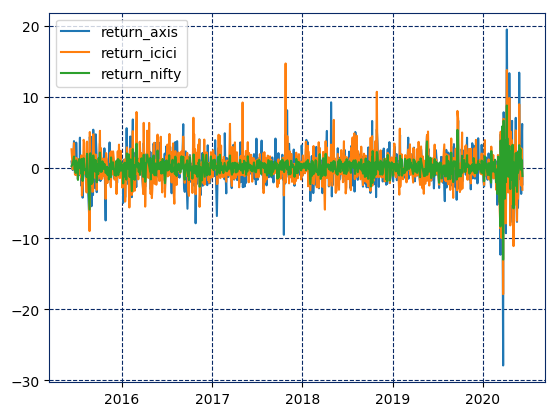

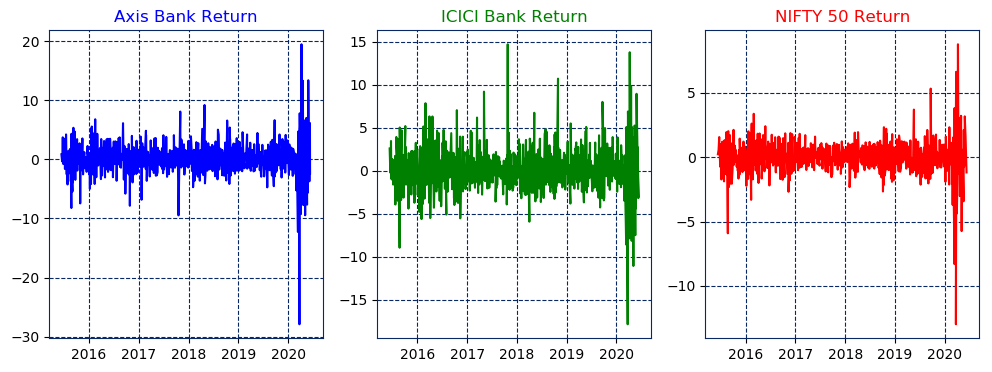

In [89]:
plt.plot(data['return_axis'])
plt.plot(data['return_icici'])
plt.plot(data['return_nifty'])
plt.legend()
#fig = plt.figure()
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
axes[0].plot(data['return_axis'], color = 'b')
axes[1].plot(data['return_icici'], color = 'g')
axes[2].plot(data['return_nifty'], color = 'r')
axes[0].set_title("Axis Bank Return", color = 'b')
axes[1].set_title("ICICI Bank Return", color = 'g')
axes[2].set_title("NIFTY 50 Return", color = 'r')
plt.show()

Avg. return of ICICI Bank is higher than the NIFTY 50 whereas Avg. return of Axis Bank is lower than NIFTY 50. From the graph, we can see that the trend is same but risk return varies.

In [90]:
data['mean_return_axis'] = (data['return_axis'] - data['return_axis'].mean())
data['mean_return_icici'] = (data['return_icici'] - data['return_icici'].mean())
data['mean_return_nifty'] = (data['return_nifty'] -  data['return_nifty'].mean())

In [91]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,Axis_Adj Close,ICICI_Adj Close,Nifty_Adj Close,return_axis,return_icici,return_nifty,mean_return_axis,mean_return_icici,mean_return_nifty
Date,,,,,,,,,,,,,,,
2015-06-11,570.200012,545.049988,567.900024,546.750000,7608358.0,531.475281,531.475281,247.193405,7965.350098,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-12,552.500000,540.799988,547.000000,551.450012,5518696.0,536.043945,536.043945,253.576019,7982.899902,0.859619,2.582033,0.220327,0.850468,2.528328,0.192244
2015-06-15,555.000000,545.349976,553.900024,550.049988,5896234.0,534.683044,534.683044,256.361145,8013.899902,-0.253879,1.098340,0.388330,-0.263030,1.044635,0.360247
2015-06-16,553.950012,540.049988,550.000000,551.150024,6283177.0,535.752380,535.752380,258.803162,8047.299805,0.199994,0.952569,0.416775,0.190843,0.898865,0.388692
2015-06-17,557.400024,547.599976,553.099976,549.250000,4522392.0,533.905396,533.905396,258.203705,8091.549805,-0.344746,-0.231627,0.549874,-0.353897,-0.285331,0.521791


In [98]:
data['cov_axis_nifty'] = (data['mean_return_axis']*data['mean_return_nifty'])
data['cov_icici_nifty'] = (data['mean_return_icici']*data['mean_return_nifty'])
covariance_axis = ((data['cov_axis_nifty'].sum())/(data.shape[0]))
covariance_icici = ((data['cov_icici_nifty'].sum())/(data.shape[0]))
print("Value of covariance for axis: ", covariance_axis)
print("Value of covariance for icic: ", covariance_icici)
                    

Value of covariance for axis:  1.8743757843120947
Value of covariance for icic:  1.8774637163291816


In [99]:
data['mean_return_nifty_sqr'] = data['mean_return_nifty']**2
mean_return_nifty_sqr_sum = data['mean_return_nifty_sqr'].sum()
#print(mean_return_nifty_sqr_sum)
variance = data['mean_return_nifty_sqr'].sum()/(data.shape[0])
print("Value of variance for NIFTY 50: ", variance)

Value of variance for NIFTY 50:  1.3063266357761953


In [100]:
beta_axis = covariance_axis/variance
beta_icici = covariance_icici/variance
print(beta_axis)
print(beta_icici)

1.4348446498592407
1.437208478271307


Beta shows the risk assiciated with both the banks are higher than the market i.e both the stocks are more voletile than the market.

In [101]:
alpha_axis = (data['return_axis'].mean())/(beta_axis*data['return_nifty'].mean())
alpha_icici = (data['return_icici'].mean())/(beta_icici*data['return_nifty'].mean())
print(alpha_axis)
print(alpha_icici)

0.22710151624680813
1.3305939027102163


Alpha is a measure of perforance of an investment. It shows the excess return from an investment as compared to its benchmark. Thus, according to the above  calculated figures the excess return of ICICI Bank is way higher than Axis Bank. 

In [102]:
Rf = 0.078

In [103]:
sharpe_index_axis = (data['return_axis'].mean()-Rf)/(alpha_axis+beta_axis)
sharpe_index_icici = (data['return_icici'].mean()-Rf)/(alpha_icici+beta_icici)
print(sharpe_index_axis)
print(sharpe_index_icici)

-0.04142675174920222
-0.008778046653851483


The Sharpe ratio is simply the risk premium per unit of risk, which is quantified by the total risk of the portfolio. Both the stocks have negative ratio means return per unit risk is low.

In [106]:
Treynor_index_axis = (data['return_axis'].mean() - Rf)*beta_axis
Treynor_index_icici = (data['return_icici'].mean() - Rf)*beta_icici

In [108]:
print(Treynor_index_axis)
print(Treynor_index_icici)

-0.09878766412817776
-0.034918271209229336


Treynor Ratio is a performance metric for determining how much excess return was generated for each unit of syatematic risk taken. The above calculated no shows the return is not as per the risk taken.

In [104]:
jenson_Index_axis = alpha_axis+(beta_axis*(data['return_axis'].mean() - Rf))
jenson_Index_icici =  alpha_icici+(beta_icici*(data['return_icici'].mean() - Rf))
print(jenson_Index_axis)
print(jenson_Index_icici)

0.1283138521186304
1.295675631500987


Jenson's Alpha determines the amount of the return which is due to market volatility as measured by the firm's beta in relation to the market beta. Again the ICICI return is much more higher than Axis Bank.

#### Keynote : The measurement has been done with the current market risk free rate. The measurement could have been somewhat different with prevailing risk-free rate.  

<b>Therefore it is clear that the investor investing in ICICI will get more return with the same level of risk. 